## QR codes for accounts
#### 03.5 Winter School on Smart Contracts
##### Peter Gruber (peter.gruber@usi.ch)
2024-01-12 (started 2021-11-28)

* Use QR codes to ...
    * Add accounts to the phone wallet
    * Facilitate payments

## Setup
Starting with this chapter 3.4, the lines below will always automatically load ...
* The accounts MyAlgo, Alice, Bob, Charlie, Dina
* The Purestake credentials
* The functions in `algo_util.py`

In [1]:
# Loading shared code and credentials
import sys, os
codepath = '..'+os.path.sep+'..'+os.path.sep+'sharedCode'
sys.path.append(codepath)
from algo_util import *
cred = load_credentials()

# Shortcuts to directly access the main accounts
MyAlgo  = cred['MyAlgo']
Alice   = cred['Alice']
Bob     = cred['Bob']
Charlie = cred['Charlie']
Dina    = cred['Dina']

In [2]:
from algosdk import account, mnemonic
from algosdk.v2client import algod
from algosdk.transaction import PaymentTxn
import algosdk.error
import json

In [3]:
print(MyAlgo['public'])
print(Alice['public'])
print(Bob['public'])
print(Charlie['public'])
print(Dina['public'])

WSC24MVUSQ32IZYD7FNN54Z44IXWL4X7BOJD6AGFOCHOG4PDFESLZUGLTI
ALICEXOA4Q2OD5CKBYND4UX75K3TAODEC3XCVNQ3URMKUMZKUOTOSAQLIU
BOB23JBQLW3AJREEG3KD7ULMAGYGVZ2LVF2OMZ2XBJIR64NO5P24XN7WEU
CHARLS5INIT5KOLDK3F2QAZXY7N4W7GOE6UTXHEHS3RBNCR2WJXRRTH3GY
DINAAZWBJM6DRY73CWK7IOA4S7C6PVXQMQ4DJ3TK3DAGAGFJTX5KEYESDI


## QR codes
* Install `qrcode` package
* Introduction to QR codes
    * Create a QR code that points to the course website

In [ ]:
# Installing the qrcode package. Run this once, then comment out
!pip install qrcode

In [4]:
import qrcode, urllib

In [5]:
qr = qrcode.QRCode()                         # create empty QR code
qr.add_data('https://www.usi.ch/wsc')        # add data
qr.make(fit=True)                            # create code
img = qr.make_image(fill_color="black", back_color="white")

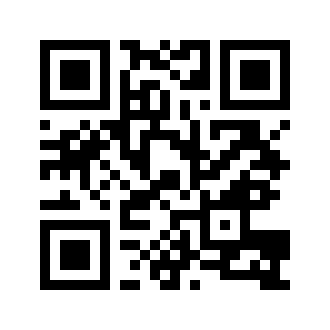

In [6]:
# Display QR code
img

**EXERCISE:** Try the QR code with your phone

## Payment QR code
* Create a QR code so that everybody can pay 0.5 ALGO to ALICE
* Specific URL for the payment
* Details here: https://developer.algorand.org/docs/get-details/transactions/payment_prompts/

#### Step 1: Prepare payment URL

In [7]:
amount = 0.5                                                        # in algos, will be multiplied by 1million below
amount_microalgo = str(int(amount*1e6))                             # in millialgos, must be integer
note_encoded   =  urllib.parse.quote('Thanks for the coffee')       # encode spaces etc

recipient = Alice['public']

# Specific URL structure
url = 'algorand://' + recipient + '?amount=' + amount_microalgo + '&note=' + note_encoded
print(url)

algorand://ALICEXOA4Q2OD5CKBYND4UX75K3TAODEC3XCVNQ3URMKUMZKUOTOSAQLIU?amount=500000&note=Thanks%20for%20the%20coffee


#### Step 2: Create payment QR code

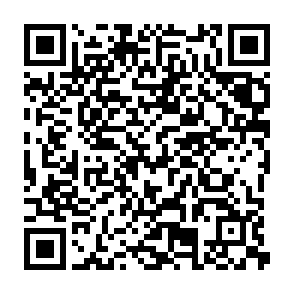

In [8]:
qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

#### Three ways to use this QR code
- Scan with iPhone / Android Camera app $\rightarrow$ will open Pera wallet app
- Scan with general QR scanner in Pera wallet (top) $\rightarrow$ have to choose from which account you pay
- Start a payment manually and then scan address 

**EXERCISE** Use your neighbour's QR code to pay 0.5 ALGO to their ALICE accounts.

## Appendix: QR code to install an account on the phone wallet

<div class="alert alert-warning">

## ❗️ Security guidelines
    
* The QR code contains your private key
* Anyone who has the QR code can steal your crypto
* Anything that you display in a Jupyter notebook will be saved with the code
* Extra security
    * We don't display QR code on screen, we save it as PNG file
    * This demo uses the Bob account
</div>

In [10]:
passphrase = Bob['mnemonic']
url = '{"mnemonic": "'+passphrase+'"}'
qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img.save('account.png')

**EXERCISE:** 
* Open the PNG file with the QR code.
* Open the Pera wallet app, scan the QR code and add the `Bob` to your wallet.

## *Appendix: Playing with QR codes
* Documentation: https://pypi.org/project/qrcode/
* Error correction levels:
    * ERROR_CORRECT_L (can correct 7%)
    * ERROR_CORRECT_M (15%)
    * ERROR_CORRECT_Q (25%)
    * ERROR_CORRECT_H (30%) <-- most robust code
* Colors are CSS colors https://www.w3schools.com/cssref/css_colors.asp

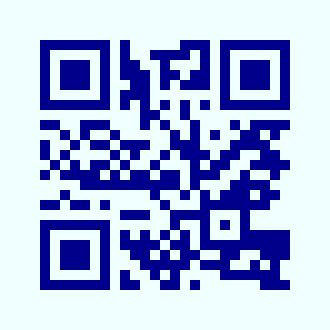

In [11]:
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_L, 
                   box_size=10,
                   border=4)
qr.add_data('https://www.usi.ch/wsc')
qr.make(fit=True)
img = qr.make_image(fill_color="darkblue", back_color="azure")
img

**EXERCISE:** Create a QR code with white color on a black background and test it with your mobile phone.

## *Appendix: store a QR code as PNG file
* This is how the QR code for the Assignment 02 has been created

In [12]:
recipient = MyAlgo['public']

# Specific URL structure
url = 'algorand://' + recipient
qr = qrcode.QRCode(box_size=5)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img.save('MyAlgo.png')